In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Research/GazeSemgIntegration/more_features

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Research/GazeSemgIntegration/more_features


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import lightgbm as ltb
from copy import deepcopy
import warnings
import math


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')

# pd.set_option("display.max_rows", None, "display.max_columns", None)

# S010

In [ ]:
trainx_raw = pd.read_csv('featured_data/step50ms/combined_trainx.csv')
trainy_raw = pd.read_csv('featured_data/step50ms/combined_trainy.csv')

testx_raw = pd.read_csv('featured_data/step50ms/combined_testx.csv')
testy_raw = pd.read_csv('featured_data/step50ms/combined_testy.csv')

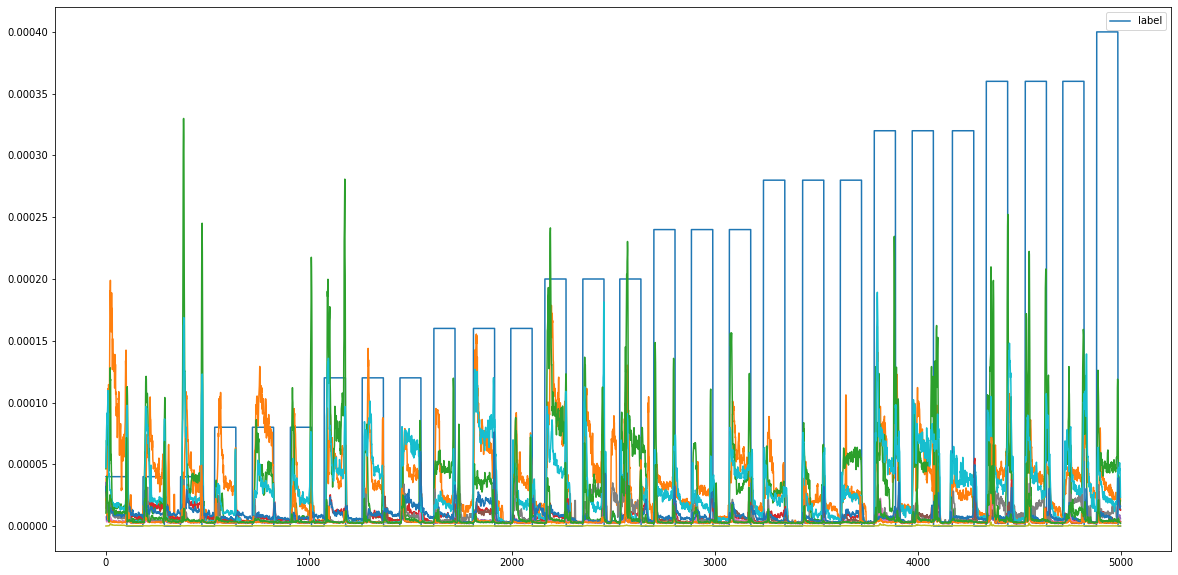

In [ ]:
# testx_raw_5000 = testx_raw.iloc[0:5000,:]
# testy_raw_5000 = testy_raw.iloc[0:5000,:]
# index = np.array(testx_raw_5000.index)
# fig, ax = plt.subplots(1, figsize = (20,10))
# line1, = ax.plot(testy_raw_5000*0.00004)
# for i in tqdm(range(0,12)):
#     ax.plot(index, testx_raw_5000[str(i)])
    
# line1.set_label('label')
# ax.legend()
# plt.show();

In [ ]:
time_node_arr = []
acc_arr = []
for time_node in tqdm(range(0, 91)): # 91 means 90*50ms=4500ms grasp period
    win_pos = time_node

    current_index_list = []
    last_value = 1
    current_value = 0
    trainx_tran = deepcopy(trainx_raw)
    trainy_tran = deepcopy(trainy_raw)


    for i in range(0, len(trainy_raw)):
        current_value = trainy_raw.iloc[i,0]
        if current_value == last_value:
            last_value = current_value

            current_index_list.append(i)
            if i == len(trainy_raw) - 1:
                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)
        else:
            last_value = current_value
            
            if current_value == 0:
                for j in range(win_pos,win_pos+4):
                    current_index_list = np.delete(current_index_list, win_pos)

                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
            else:
                # trainy_tran.loc[current_index_list, '0'] = current_value
                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)

                current_index_list = []
                current_index_list.append(i)

    zero_arr = []
    for i in range(0, len(trainy_tran)):
        if trainy_tran.iloc[i, 0] == 0:
            zero_arr.append(trainy_tran.index[i])

    trainx_tran = trainx_tran.drop(zero_arr)
    trainy_tran = trainy_tran.drop(zero_arr)


    current_index_list = []
    last_value = 1
    current_value = 0
    testx_tran = deepcopy(testx_raw)
    testy_tran = deepcopy(testy_raw)

    for i in range(0, len(testy_raw)):
        
        current_value = testy_raw.iloc[i,0]
        if current_value == last_value:
            last_value = current_value

            current_index_list.append(i)
            if i == len(testy_raw) - 1:
                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
        else:
            last_value = current_value
            
            if current_value == 0:
                for j in range(win_pos,win_pos+4):
                    current_index_list = np.delete(current_index_list, win_pos)

                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
            else:
                # testy_tran.loc[current_index_list, '0'] = current_value
                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
        



    zero_arr = []
    for i in range(0, len(testy_tran)):
        if testy_tran.iloc[i, 0] == 0:
            zero_arr.append(testy_tran.index[i])

    testx_tran = testx_tran.drop(zero_arr)
    testy_tran = testy_tran.drop(zero_arr)



    trainx_tran = trainx_tran.reset_index(drop=True)
    trainy_tran = trainy_tran.reset_index(drop=True)
    testx_tran = testx_tran.reset_index(drop=True)
    testy_tran = testy_tran.reset_index(drop=True)



    # train/test model
    lightGBM_model = ltb.LGBMClassifier();
    lightGBM_model.fit(trainx_tran,trainy_tran);
    expected1 = testy_tran.values.flatten();
    predicted1 = lightGBM_model.predict(testx_tran);
    counter = 0
    for i in range(0, len(expected1)):
        if expected1[i] == predicted1[i]:
            counter += 1

    accuracy = counter/len(expected1)

    acc_arr.append(accuracy)
    time_node_arr.append(time_node)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

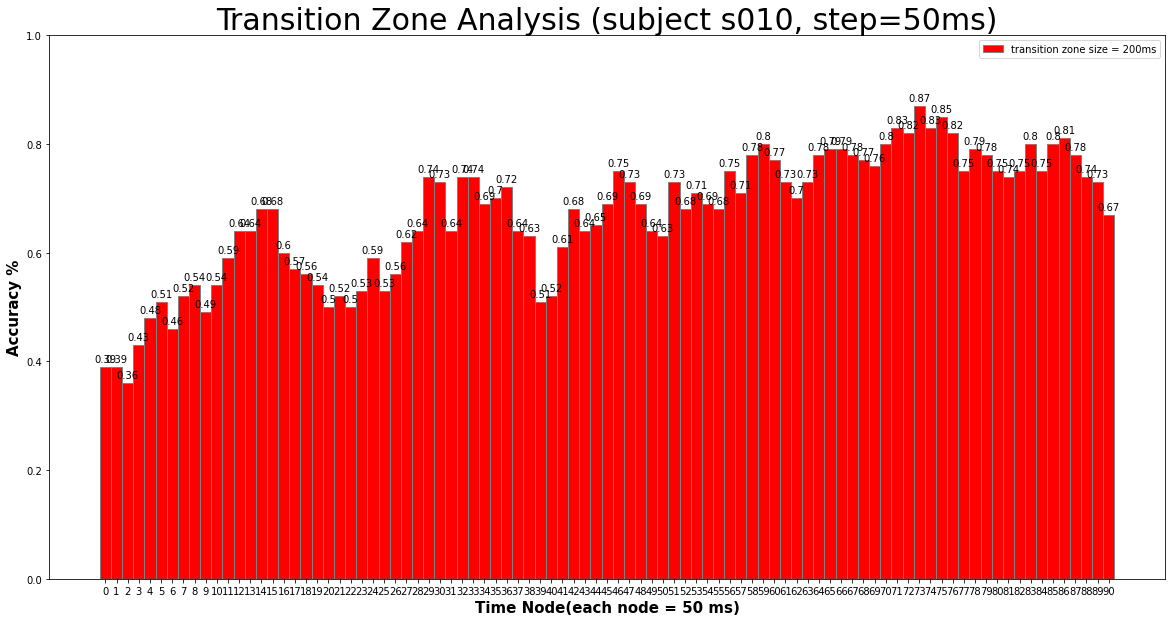

In [ ]:
# set width of bar
barWidth = 1.0
fig,ax = plt.subplots(figsize =(20, 10))

# set height of bar
# acc_arr

# Set position of bar on X axis
br1 = np.arange(len(acc_arr))
# br2 = [x + barWidth for x in br1]

# Make the plot
acc = ax.bar(br1, np.round(acc_arr, 2), color ='r', width = barWidth, edgecolor ='grey', label ='transition zone size = 200ms')
for p in acc:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

# Adding Xticks
ax.set_xlabel('Time Node(each node = 50 ms)', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Accuracy %', fontweight ='bold', fontsize = 15)
ax.set_xticks(br1)
ax.set_xticklabels(time_node_arr)

ax.set_ylim(0, 1)
ax.set_title('Transition Zone Analysis (subject s010, step=50ms)',size=30)
ax.legend()
plt.show();

# S010-2

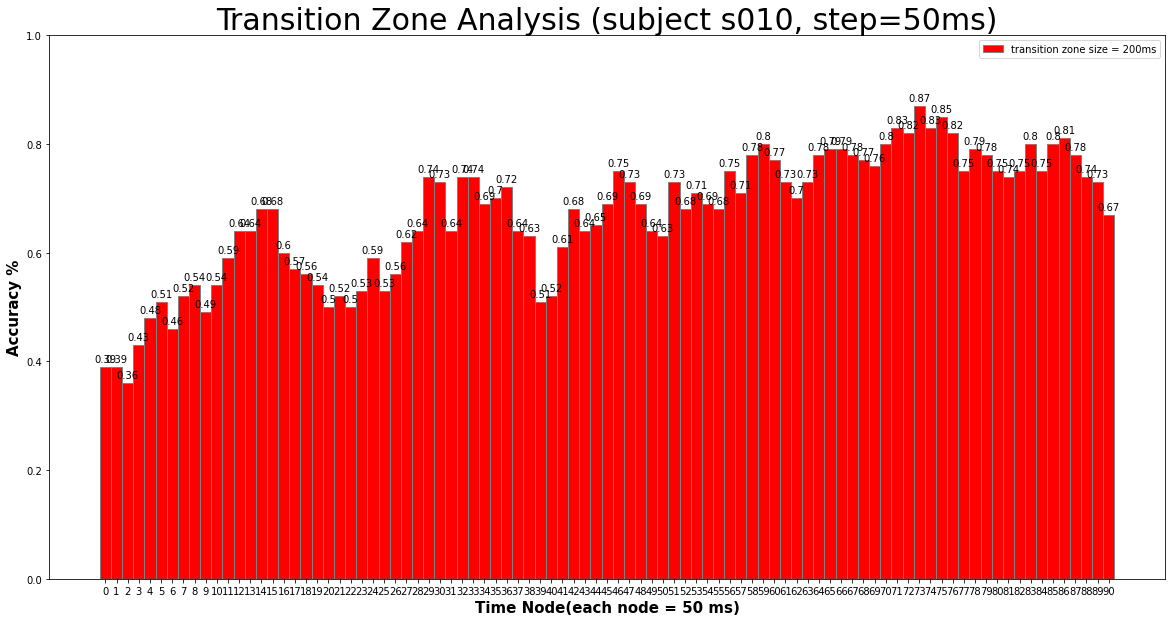

In [ ]:
subject = '10'
# trainx_raw = pd.read_csv('featured_data/step50ms/combined_trainx.csv')
# trainy_raw = pd.read_csv('featured_data/step50ms/combined_trainy.csv')
# testx_raw = pd.read_csv('featured_data/step50ms/combined_testx.csv')
# testy_raw = pd.read_csv('featured_data/step50ms/combined_testy.csv')

trainx_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_trainx.csv')
trainy_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_trainy.csv')
testx_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_testx.csv')
testy_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_testy.csv')


time_node_arr = []
acc_arr = []
for time_node in tqdm(range(0, 91)): # 91 means 90*50ms=4500ms grasp period
    win_pos = time_node

    current_index_list = []
    last_value = 1
    current_value = 0
    trainx_tran = deepcopy(trainx_raw)
    trainy_tran = deepcopy(trainy_raw)


    for i in range(0, len(trainy_raw)):
        current_value = trainy_raw.iloc[i,0]
        if current_value == last_value:
            last_value = current_value

            current_index_list.append(i)
            if i == len(trainy_raw) - 1:
                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)
        else:
            last_value = current_value
            
            if current_value == 0:
                for j in range(win_pos,win_pos+4):
                    current_index_list = np.delete(current_index_list, win_pos)

                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
            else:
                # trainy_tran.loc[current_index_list, '0'] = current_value
                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)

                current_index_list = []
                current_index_list.append(i)

    zero_arr = []
    for i in range(0, len(trainy_tran)):
        if trainy_tran.iloc[i, 0] == 0:
            zero_arr.append(trainy_tran.index[i])

    trainx_tran = trainx_tran.drop(zero_arr)
    trainy_tran = trainy_tran.drop(zero_arr)


    current_index_list = []
    last_value = 1
    current_value = 0
    testx_tran = deepcopy(testx_raw)
    testy_tran = deepcopy(testy_raw)

    for i in range(0, len(testy_raw)):
        
        current_value = testy_raw.iloc[i,0]
        if current_value == last_value:
            last_value = current_value

            current_index_list.append(i)
            if i == len(testy_raw) - 1:
                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
        else:
            last_value = current_value
            
            if current_value == 0:
                for j in range(win_pos,win_pos+4):
                    current_index_list = np.delete(current_index_list, win_pos)

                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
            else:
                # testy_tran.loc[current_index_list, '0'] = current_value
                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
        



    zero_arr = []
    for i in range(0, len(testy_tran)):
        if testy_tran.iloc[i, 0] == 0:
            zero_arr.append(testy_tran.index[i])

    testx_tran = testx_tran.drop(zero_arr)
    testy_tran = testy_tran.drop(zero_arr)



    trainx_tran = trainx_tran.reset_index(drop=True)
    trainy_tran = trainy_tran.reset_index(drop=True)
    testx_tran = testx_tran.reset_index(drop=True)
    testy_tran = testy_tran.reset_index(drop=True)



    # train/test model
    lightGBM_model = ltb.LGBMClassifier();
    lightGBM_model.fit(trainx_tran,trainy_tran);
    expected1 = testy_tran.values.flatten();
    predicted1 = lightGBM_model.predict(testx_tran);
    counter = 0
    for i in range(0, len(expected1)):
        if expected1[i] == predicted1[i]:
            counter += 1

    accuracy = counter/len(expected1)

    acc_arr.append(accuracy)
    time_node_arr.append(time_node)




# set width of bar
barWidth = 1.0
fig,ax = plt.subplots(figsize =(20, 10))

# set height of bar
# acc_arr

# Set position of bar on X axis
br1 = np.arange(len(acc_arr))
# br2 = [x + barWidth for x in br1]

# Make the plot
acc = ax.bar(br1, np.round(acc_arr, 2), color ='r', width = barWidth, edgecolor ='grey', label ='transition zone size = 200ms')
for p in acc:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

# Adding Xticks
ax.set_xlabel('Time Node(each node = 50 ms)', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Accuracy %', fontweight ='bold', fontsize = 15)
ax.set_xticks(br1)
ax.set_xticklabels(time_node_arr)

ax.set_ylim(0, 1)
ax.set_title('Transition Zone Analysis (subject s010, step=50ms)',size=30)
ax.legend()
plt.show();

In [4]:
# trainx_raw1 = pd.read_csv('featured_data/step50ms/combined_trainx.csv')
# trainy_raw1 = pd.read_csv('featured_data/step50ms/combined_trainy.csv')
# testx_raw1 = pd.read_csv('featured_data/step50ms/combined_testx.csv')
# testy_raw1 = pd.read_csv('featured_data/step50ms/combined_testy.csv')

# subject = '10'
# trainx_raw2 = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_trainx.csv')
# trainy_raw2 = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_trainy.csv')
# testx_raw2 = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_testx.csv')
# testy_raw2 = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_testy.csv')

In [7]:
# testx_raw1

,0,1,2,3,4,5,6,7,8,9,10,11,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,0.3,1.3,2.3,3.3,...,8.4,9.4,10.4,11.4,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,0.6,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6,0.7,1.7,2.7,3.7,4.7,5.7,6.7,7.7,8.7,9.7,10.7,11.7
0,0.000030,0.000046,0.000027,0.000030,0.000029,0.000007,0.000015,7.946580e-08,0.000048,0.000029,0.000021,0.000011,0.000030,0.000046,0.000027,0.000030,0.000028,0.000007,0.000015,7.975609e-08,0.000048,0.000029,0.000021,0.000011,0.006279,0.011084,0.007167,0.007751,0.007910,0.002054,0.002010,0.000019,0.011438,0.007512,0.004642,0.001992,0.000016,0.000029,0.000019,0.000020,...,0.005368,0.003109,0.002082,0.000912,3.495223e-07,8.282627e-07,2.863577e-07,3.369566e-07,3.128581e-07,2.073312e-08,8.232709e-08,2.455359e-12,8.735900e-07,3.165096e-07,1.739391e-07,4.288477e-08,0.000009,0.000013,0.000006,0.000007,0.000006,2.318576e-06,0.000003,5.523310e-08,0.000014,0.000008,0.000005,0.000002,2.808033e-10,5.569885e-10,1.151818e-10,9.140494e-11,8.181301e-11,1.336500e-11,9.008756e-11,1.075720e-14,5.123136e-10,1.587403e-10,1.312907e-10,3.437288e-11
1,0.000033,0.000053,0.000029,0.000036,0.000026,0.000007,0.000015,8.349542e-08,0.000056,0.000032,0.000023,0.000013,0.000033,0.000053,0.000029,0.000036,0.000026,0.000007,0.000015,8.442154e-08,0.000056,0.000032,0.000023,0.000013,0.007758,0.014409,0.007970,0.009087,0.007250,0.001916,0.002423,0.000020,0.015105,0.008944,0.005335,0.002721,0.000020,0.000037,0.000021,0.000024,...,0.007382,0.003696,0.002274,0.001216,4.096648e-07,1.071680e-06,3.271227e-07,4.868581e-07,2.606020e-07,1.865206e-08,9.044671e-08,2.751021e-12,1.204735e-06,4.046495e-07,1.962190e-07,7.017013e-08,0.000011,0.000018,0.000007,0.000008,0.000006,2.267265e-06,0.000003,6.001398e-08,0.000019,0.000010,0.000006,0.000003,3.417121e-10,7.751079e-10,1.402025e-10,1.679889e-10,7.813816e-11,1.313479e-11,9.301392e-11,1.229397e-14,7.714331e-10,2.011053e-10,1.366743e-10,4.536004e-11
2,0.000039,0.000062,0.000028,0.000033,0.000024,0.000005,0.000017,9.162478e-08,0.000070,0.000028,0.000013,0.000025,0.000039,0.000062,0.000028,0.000033,0.000024,0.000005,0.000017,9.303622e-08,0.000070,0.000028,0.000013,0.000025,0.010062,0.017093,0.006938,0.007469,0.005918,0.001420,0.003272,0.000022,0.018841,0.007104,0.003283,0.005233,0.000026,0.000044,0.000018,0.000019,...,0.009336,0.002988,0.001237,0.002551,5.793453e-07,1.493257e-06,2.959413e-07,4.257301e-07,2.162456e-07,8.779048e-09,1.086482e-07,3.341115e-12,1.896309e-06,3.120324e-07,7.002083e-08,2.452829e-07,0.000014,0.000022,0.000007,0.000007,0.000004,1.655883e-06,0.000004,6.522983e-08,0.000024,0.000008,0.000003,0.000007,5.424950e-10,1.170697e-09,1.301506e-10,1.495877e-10,5.600416e-11,4.686912e-12,1.060105e-10,1.361119e-14,1.182344e-09,1.537952e-10,3.067727e-11,1.870994e-10
3,0.000038,0.000070,0.000019,0.000025,0.000019,0.000004,0.000021,1.010973e-07,0.000077,0.000020,0.000012,0.000028,0.000038,0.000069,0.000019,0.000025,0.000019,0.000004,0.000021,1.043061e-07,0.000077,0.000020,0.000012,0.000028,0.009958,0.019824,0.004677,0.004874,0.004058,0.001205,0.004360,0.000024,0.021267,0.004337,0.002580,0.006543,0.000026,0.000051,0.000012,0.000013,...,0.010950,0.001953,0.000982,0.003268,5.610752e-07,1.859975e-06,1.348847e-07,2.399626e-07,1.419767e-07,6.156706e-09,1.710023e-07,4.199590e-12,2.312041e-06,1.543501e-07,5.254339e-08,2.980987e-07,0.000014,0.000027,0.000005,0.000005,0.000003,1.616312e-06,0.000005,7.175166e-08,0.000028,0.000005,0.000003,0.000008,5.337320e-10,1.582886e-09,6.417886e-11,1.063014e-10,3.955144e-11,4.204583e-12,1.359970e-10,1.661147e-14,1.561228e-09,7.724701e-11,2.137080e-11,2.351240e-10
4,0.000034,0.000066,0.000013,0.000022,0.000013,0.000003,0.000022,1.022580e-07,0.000083,0.000017,0.000010,0.000038,0.000034,0.000066,0.000013,0.000022,0.000013,0.000003,0.000021,1.048882e-07,0.000083,0.000017,0.000010,0.000038,0.008928,0.019004,0.002916,0.003570,0.002864,0.001073,0.004571,0.000024,0.022731,0.003367,0.002278,0.008590

In [8]:
# testx_raw2

,0,1,2,3,4,5,6,7,8,9,10,11,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,0.3,1.3,2.3,3.3,...,8.4,9.4,10.4,11.4,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,0.6,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6,0.7,1.7,2.7,3.7,4.7,5.7,6.7,7.7,8.7,9.7,10.7,11.7
0,0.000030,0.000046,0.000027,0.000030,0.000029,0.000007,0.000015,7.946580e-08,0.000048,0.000029,0.000021,0.000011,0.000003,0.000005,0.000005,0.000003,0.000003,0.000003,0.000003,1.028349e-07,0.000004,0.000007,0.000003,0.000003,0.001041,0.001438,0.001408,0.000945,0.000959,0.000856,0.000959,0.000022,0.001092,0.002095,0.000869,0.000910,0.000003,0.000004,0.000004,0.000002,...,0.000594,0.001113,0.000475,0.000513,4.450962e-09,8.153649e-09,8.302594e-09,3.548761e-09,3.709523e-09,3.152887e-09,4.258619e-09,4.081957e-12,5.139403e-09,2.007953e-08,3.041965e-09,3.438034e-09,0.000001,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,7.132509e-08,0.000002,0.000003,0.000001,0.000001,2.733645e-12,5.125830e-12,5.145922e-12,3.150903e-12,2.267705e-12,2.322361e-12,3.281232e-12,1.580653e-14,3.812041e-12,1.588654e-11,2.333493e-12,3.074460e-12
1,0.000033,0.000053,0.000029,0.000036,0.000026,0.000007,0.000015,8.349542e-08,0.000056,0.000032,0.000023,0.000013,0.000004,0.000005,0.000005,0.000003,0.000003,0.000003,0.000003,1.293218e-07,0.000004,0.000008,0.000003,0.000003,0.001091,0.001448,0.001437,0.000907,0.000935,0.000822,0.000942,0.000026,0.001079,0.002292,0.000999,0.000936,0.000003,0.000004,0.000004,0.000002,...,0.000587,0.001141,0.000486,0.000523,4.788602e-09,8.175165e-09,8.452035e-09,3.285711e-09,3.604638e-09,2.984736e-09,4.213469e-09,6.455518e-12,4.846873e-09,2.435046e-08,3.975647e-09,3.532100e-09,0.000001,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,8.219642e-08,0.000002,0.000003,0.000001,0.000001,2.536338e-12,4.892381e-12,5.559954e-12,3.045669e-12,2.283000e-12,2.277439e-12,3.479255e-12,2.100230e-14,3.890628e-12,1.670239e-11,2.408719e-12,3.117057e-12
2,0.000039,0.000062,0.000028,0.000033,0.000024,0.000005,0.000017,9.162478e-08,0.000070,0.000028,0.000013,0.000025,0.000004,0.000005,0.000005,0.000003,0.000003,0.000003,0.000003,1.289109e-07,0.000003,0.000008,0.000003,0.000003,0.001192,0.001438,0.001487,0.000861,0.000854,0.000821,0.000819,0.000026,0.000975,0.002419,0.000930,0.000901,0.000003,0.000004,0.000004,0.000002,...,0.000557,0.001207,0.000471,0.000499,5.478823e-09,8.286302e-09,9.271660e-09,3.028364e-09,2.980147e-09,2.971243e-09,2.643628e-09,6.414552e-12,3.867405e-09,2.667036e-08,3.553338e-09,3.164102e-09,0.000001,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,8.263134e-08,0.000001,0.000003,0.000001,0.000001,2.729528e-12,5.285263e-12,5.783736e-12,2.875890e-12,2.361088e-12,2.464102e-12,2.315802e-12,2.107548e-14,3.536184e-12,1.793605e-11,2.308241e-12,2.615510e-12
3,0.000038,0.000070,0.000019,0.000025,0.000019,0.000004,0.000021,1.010973e-07,0.000077,0.000020,0.000012,0.000028,0.000004,0.000005,0.000005,0.000003,0.000003,0.000003,0.000003,1.211863e-07,0.000003,0.000009,0.000003,0.000003,0.001130,0.001423,0.001512,0.000783,0.000843,0.000783,0.000822,0.000024,0.001033,0.002582,0.000869,0.000838,0.000003,0.000004,0.000004,0.000002,...,0.000600,0.001236,0.000443,0.000492,4.970505e-09,8.272109e-09,1.002203e-08,2.435479e-09,2.819513e-09,2.591318e-09,2.728779e-09,5.668845e-12,4.259188e-09,2.905157e-08,3.239192e-09,2.902402e-09,0.000001,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,7.828261e-08,0.000002,0.000003,0.000001,0.000001,2.823257e-12,5.165021e-12,6.268888e-12,2.530489e-12,2.047157e-12,2.577901e-12,2.240649e-12,1.961192e-14,3.927303e-12,1.746148e-11,2.052197e-12,2.558178e-12
4,0.000034,0.000066,0.000013,0.000022,0.000013,0.000003,0.000022,1.022580e-07,0.000083,0.000017,0.000010,0.000038,0.000003,0.000004,0.000005,0.000003,0.000003,0.000003,0.000003,1.411255e-07,0.000003,0.000009,0.000003,0.000003,0.001053,0.001345,0.001509,0.000809,0.000827,0.000812,0.000782,0.000030,0.001047,0.002674,0.000903,0.000977,0.000003,0.0000

In [26]:
# trainx_raw1.iloc[500,10]

5.168811648372212e-06

In [27]:
# trainx_raw2.iloc[500,10]

5.168811648372211e-06

In [28]:
# testx_raw1.iloc[500,10]

2.9903500152763215e-06

In [29]:
# testx_raw2.iloc[500,10]

2.9903500152763227e-06

In [30]:
# # train/test model
# lightGBM_model = ltb.LGBMClassifier();
# lightGBM_model.fit(trainx_raw1,trainy_raw1);
# expected1 = testy_raw1.values.flatten();
# predicted1 = lightGBM_model.predict(testx_raw1);
# counter = 0
# for i in range(0, len(expected1)):
#     if expected1[i] == predicted1[i]:
#         counter += 1

# accuracy = counter/len(expected1)
# accuracy

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

0.8137562234925318

In [31]:
# # train/test model
# lightGBM_model = ltb.LGBMClassifier();
# lightGBM_model.fit(trainx_raw2,trainy_raw2);
# expected1 = testy_raw2.values.flatten();
# predicted1 = lightGBM_model.predict(testx_raw2);
# counter = 0
# for i in range(0, len(expected1)):
#     if expected1[i] == predicted1[i]:
#         counter += 1

# accuracy = counter/len(expected1)
# accuracy

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

0.23049972340033192

In [36]:
# testy_raw1 ==testy_raw2

,0
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [33]:
# trainy_raw2

,0
0,1
1,1
2,1
3,1
4,1
...,...
16912,0
16913,0
16914,0
16915,0


# S011

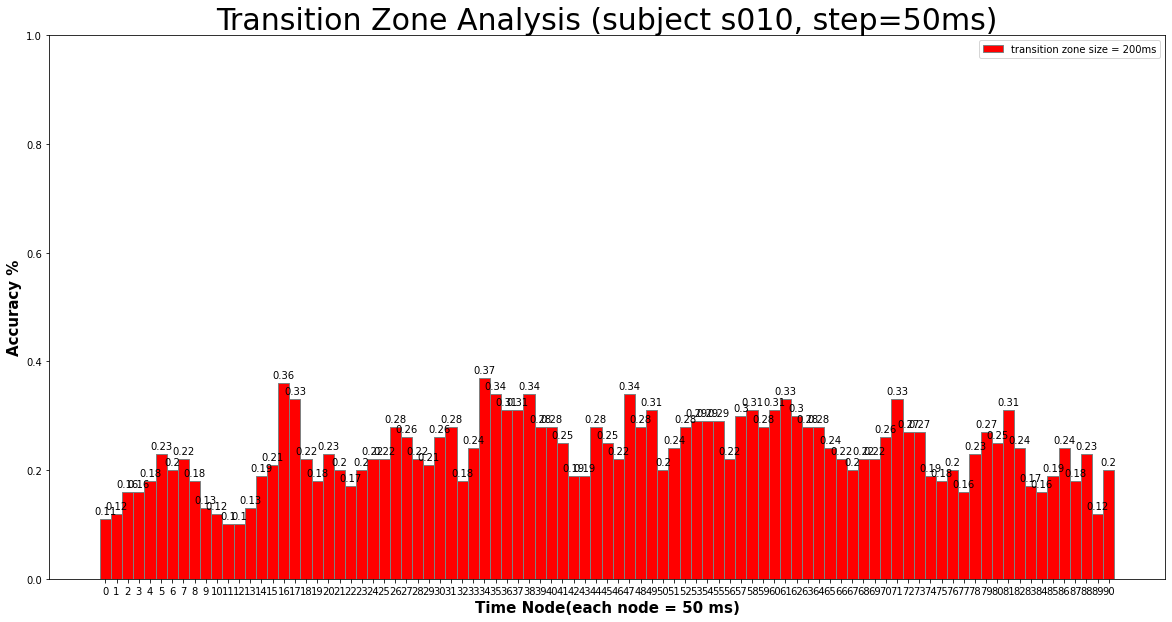

In [37]:
subject = '11'

trainx_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_trainx.csv')
trainy_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_trainy.csv')
testx_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_testx.csv')
testy_raw = pd.read_csv('featured_data/all_intact_featured_step50ms/S0' + subject + '/combined_testy.csv')


time_node_arr = []
acc_arr = []
for time_node in tqdm(range(0, 91)): # 91 means 90*50ms=4500ms grasp period
    win_pos = time_node

    current_index_list = []
    last_value = 1
    current_value = 0
    trainx_tran = deepcopy(trainx_raw)
    trainy_tran = deepcopy(trainy_raw)


    for i in range(0, len(trainy_raw)):
        current_value = trainy_raw.iloc[i,0]
        if current_value == last_value:
            last_value = current_value

            current_index_list.append(i)
            if i == len(trainy_raw) - 1:
                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)
        else:
            last_value = current_value
            
            if current_value == 0:
                for j in range(win_pos,win_pos+4):
                    current_index_list = np.delete(current_index_list, win_pos)

                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
            else:
                # trainy_tran.loc[current_index_list, '0'] = current_value
                trainx_tran = trainx_tran.drop(current_index_list)
                trainy_tran = trainy_tran.drop(current_index_list)

                current_index_list = []
                current_index_list.append(i)

    zero_arr = []
    for i in range(0, len(trainy_tran)):
        if trainy_tran.iloc[i, 0] == 0:
            zero_arr.append(trainy_tran.index[i])

    trainx_tran = trainx_tran.drop(zero_arr)
    trainy_tran = trainy_tran.drop(zero_arr)


    current_index_list = []
    last_value = 1
    current_value = 0
    testx_tran = deepcopy(testx_raw)
    testy_tran = deepcopy(testy_raw)

    for i in range(0, len(testy_raw)):
        
        current_value = testy_raw.iloc[i,0]
        if current_value == last_value:
            last_value = current_value

            current_index_list.append(i)
            if i == len(testy_raw) - 1:
                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
        else:
            last_value = current_value
            
            if current_value == 0:
                for j in range(win_pos,win_pos+4):
                    current_index_list = np.delete(current_index_list, win_pos)

                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
            else:
                # testy_tran.loc[current_index_list, '0'] = current_value
                testx_tran = testx_tran.drop(current_index_list)
                testy_tran = testy_tran.drop(current_index_list)
                
                current_index_list = []
                current_index_list.append(i)
        



    zero_arr = []
    for i in range(0, len(testy_tran)):
        if testy_tran.iloc[i, 0] == 0:
            zero_arr.append(testy_tran.index[i])

    testx_tran = testx_tran.drop(zero_arr)
    testy_tran = testy_tran.drop(zero_arr)



    trainx_tran = trainx_tran.reset_index(drop=True)
    trainy_tran = trainy_tran.reset_index(drop=True)
    testx_tran = testx_tran.reset_index(drop=True)
    testy_tran = testy_tran.reset_index(drop=True)



    # train/test model
    lightGBM_model = ltb.LGBMClassifier();
    lightGBM_model.fit(trainx_tran,trainy_tran);
    expected1 = testy_tran.values.flatten();
    predicted1 = lightGBM_model.predict(testx_tran);
    counter = 0
    for i in range(0, len(expected1)):
        if expected1[i] == predicted1[i]:
            counter += 1

    accuracy = counter/len(expected1)

    acc_arr.append(accuracy)
    time_node_arr.append(time_node)




# set width of bar
barWidth = 1.0
fig,ax = plt.subplots(figsize =(20, 10))

# set height of bar
# acc_arr

# Set position of bar on X axis
br1 = np.arange(len(acc_arr))
# br2 = [x + barWidth for x in br1]

# Make the plot
acc = ax.bar(br1, np.round(acc_arr, 2), color ='r', width = barWidth, edgecolor ='grey', label ='transition zone size = 200ms')
for p in acc:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

# Adding Xticks
ax.set_xlabel('Time Node(each node = 50 ms)', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Accuracy %', fontweight ='bold', fontsize = 15)
ax.set_xticks(br1)
ax.set_xticklabels(time_node_arr)

ax.set_ylim(0, 1)
ax.set_title('Transition Zone Analysis (subject s010, step=50ms)',size=30)
ax.legend()
plt.show();